In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%notebook inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("mushrooms.csv")

In [5]:
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


All data is in labels (use LabelEncoder)

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Encoding label data

In [7]:
enc = LabelEncoder()

ls = []

df1 = df.copy()

for col in df1.columns:
    df1[col] = enc.fit_transform(df1[col])
    col_dict = {index:label for index, label in enumerate(enc.classes_)}
    ls.append(col_dict)

In [8]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
for i in ls:
    print(i)
    print("\n")

{0: 'e', 1: 'p'}


{0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}


{0: 'f', 1: 'g', 2: 's', 3: 'y'}


{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}


{0: 'f', 1: 't'}


{0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}


{0: 'a', 1: 'f'}


{0: 'c', 1: 'w'}


{0: 'b', 1: 'n'}


{0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}


{0: 'e', 1: 't'}


{0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'}


{0: 'f', 1: 'k', 2: 's', 3: 'y'}


{0: 'f', 1: 'k', 2: 's', 3: 'y'}


{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}


{0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}


{0: 'p'}


{0: 'n', 1: 'o', 2: 'w', 3: 'y'}


{0: 'n', 1: 'o', 2: 't'}


{0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'}


{0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'}


{0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'}


{0: 'd', 1: 'g', 2: 'l', 3: 'm', 4: 

Splitting data

In [9]:
X = df1.drop("class", axis = 1)
y = df1["class"]

sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Choosing K value

In [10]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

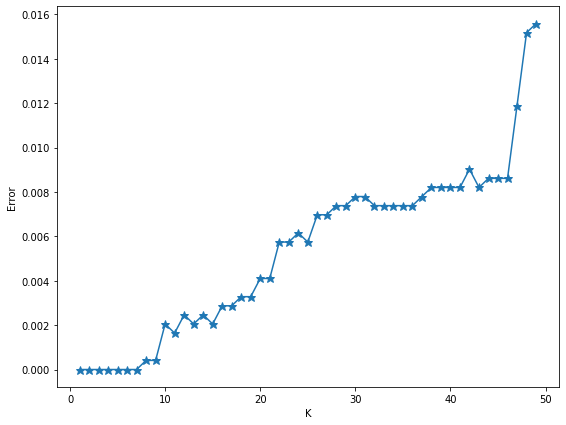

In [11]:
plt.figure(figsize=(9,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*" , markersize = 9)


Training Models

In [12]:
models = {
    "Logistic Regression" : LogisticRegression(class_weight="balanced", solver="newton-cg", penalty="none"),
    "K Nearest Neighbours": KNeighborsClassifier(n_neighbors=7),
    "       Decision Tree": DecisionTreeClassifier(),
    "     SVM Classifier" : SVC(gamma='auto'),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K Nearest Neighbours trained.
       Decision Tree trained.
     SVM Classifier trained.


Testing models

In [13]:
for name, model in models.items():
    print(name + " Accuracy: {:.5f}".format(model.score(X_test, y_test)))
                     

Logistic Regression Accuracy: 0.96801
K Nearest Neighbours Accuracy: 1.00000
       Decision Tree Accuracy: 1.00000
     SVM Classifier Accuracy: 1.00000


Cross validation

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

for name, model in models.items():
    print(name)
    print(cross_val_score(model, X, y, cv=cv))
    print("\n")

Logistic Regression
[0.96984615 0.97476923 0.96492308 0.97292308 0.95938462 0.97230769
 0.97292308 0.96430769 0.96923077 0.96676923]


K Nearest Neighbours
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


       Decision Tree
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


     SVM Classifier
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


